# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.io import loadmat
import seaborn as sbn

Loading the data and splitting the training and test data

In [ ]:
data = loadmat(r"hw02_dataset.mat")
X_train = data['X_trn']
Y_train = data['Y_trn']
X_test = data['X_tst']
Y_test = data['Y_tst']

Applying Logistic Regression on training data and predicting for test data

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(penalty='none')
logReg.fit(X_train,np.ravel(Y_train))
Y_pred = logReg.predict(X_test)

Calculating the error and accuracy for test data

In [107]:
error_arr = np.subtract(Y_test.ravel(),Y_pred,dtype=np.int32)
error = np.sum(np.abs(error_arr),dtype=np.float32)/error_arr.size
accuracy = 1-error
print(f"Classification error on test set is {error*100:.2f}%.")
print(f"Classification accuracy on test set is {accuracy*100:.2f}%.")

Classification error on test set is 0.00%.
Classification accuracy on test set is 100.00%.


Calculating the error and accuracy for training data

In [105]:
Y_pred_train = logReg.predict(X_train)
errorTrain_arr = np.subtract(Y_train.ravel(),Y_pred_train,dtype = np.int32)
errorTrain = np.sum(np.abs(errorTrain_arr),dtype=np.float32)/errorTrain_arr.size
accuracyTrain = 1-errorTrain
print(f"Classification error on training set is {errorTrain*100:.2f}%.")
print(f"Classification accuracy on training set is {accuracyTrain*100:.2f}%.")

Classification error on training set is 2.38%.
Classification accuracy on training set is 97.62%.


Plotting Scatter diagram with decision boundary for test data

Text(0.5, 1.0, 'Plot for test set (class 0:purple,class 1:yellow,boundary:red)')

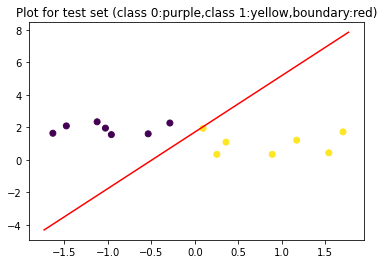

In [ ]:
intercept = logReg.intercept_[0]
w1, w2 = logReg.coef_.T
c= -intercept/w2
m = -w1/w2
x_val = np.arange(X_test[:,0].min()-0.1, X_test[:,0].max()+0.1,0.1)
y_val = m*x_val+c
plt.plot(x_val,y_val,'-', c="red")
plt.scatter(X_test[:,0],X_test[:,1], c = Y_pred)
plt.title("Plot for test set (class 0:purple,class 1:yellow,boundary:red)")

Plotting Scatter diagram with decision boundary for training data

Text(0.5, 1.0, 'Plot for training set (class 0:purple,class 1:yellow,boundary:red)')

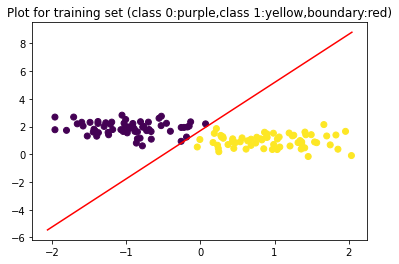

In [ ]:
intercept = logReg.intercept_[0]
w1, w2 = logReg.coef_.T
c= -intercept/w2
m = -w1/w2
x_val = np.arange(X_train[:,0].min()-0.1, X_train[:,0].max()+0.1,0.1)
y_val = m*x_val+c
plt.plot(x_val,y_val,'-', c="red")
plt.scatter(X_train[:,0],X_train[:,1], c = Y_pred_train)
plt.title("Plot for training set (class 0:purple,class 1:yellow,boundary:red)")